In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
data = pd.read_csv('/content/weather_classification_data.csv')
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [29]:
data['Cloud Cover'].value_counts()

,count
Cloud Cover,
overcast,6090
partly cloudy,4560
clear,2139
cloudy,411


In [30]:
data['Weather Type'].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [31]:
data['Season'].value_counts()

,count
Season,
Winter,5610
Spring,2598
Autumn,2500
Summer,2492


In [32]:
data['Location'].value_counts()

,count
Location,
inland,4816
mountain,4813
coastal,3571


In [33]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [34]:
data.duplicated().sum()

0

<Axes: xlabel='Season', ylabel='count'>

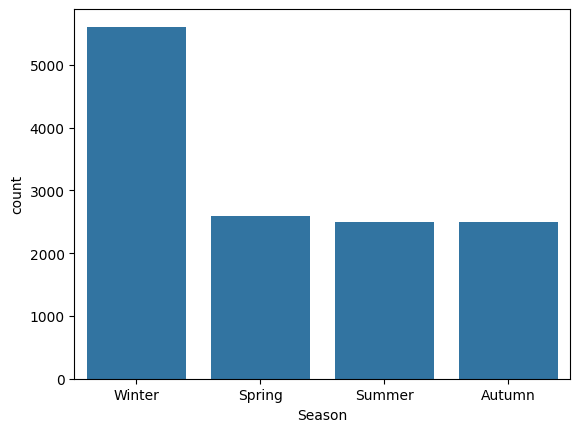

In [35]:
sns.countplot(x = "Season", data = data)

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Precipitation (%)'}>,
        <Axes: title={'center': 'Atmospheric Pressure'}>,
        <Axes: title={'center': 'UV Index'}>],
       [<Axes: title={'center': 'Visibility (km)'}>, <Axes: >, <Axes: >]],
      dtype=object)

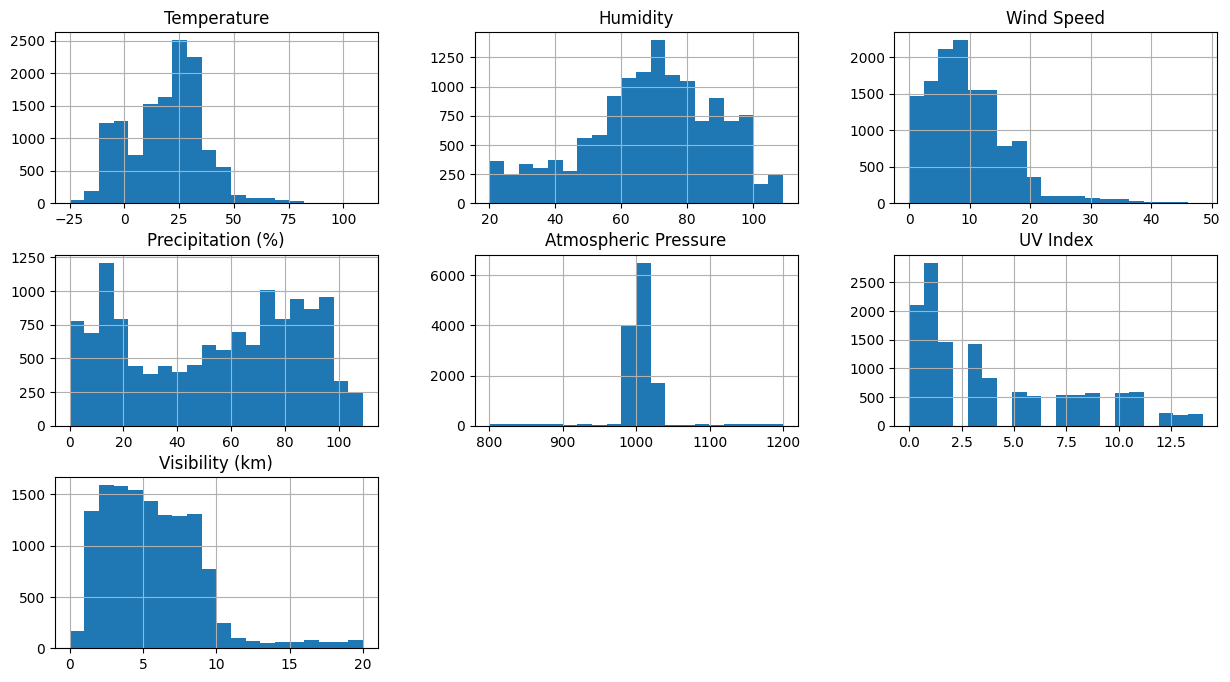

In [36]:
#visualising the distribution of numerical features
data.hist(bins = 20, figsize= (15, 8))

<ipython-input-37-3e9a1fa16e38>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Cloud Cover'], order=data['Cloud Cover'].value_counts(ascending=False).index, palette='Set2', hue=None, legend=False)
<ipython-input-37-3e9a1fa16e38>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=data['Season'], order=data['Season'].value_counts(ascending=False).index, palette='Set3', hue=None, legend=False)
<ipython-input-37-3e9a1fa16e38>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=data['Location'], order=data['Locat

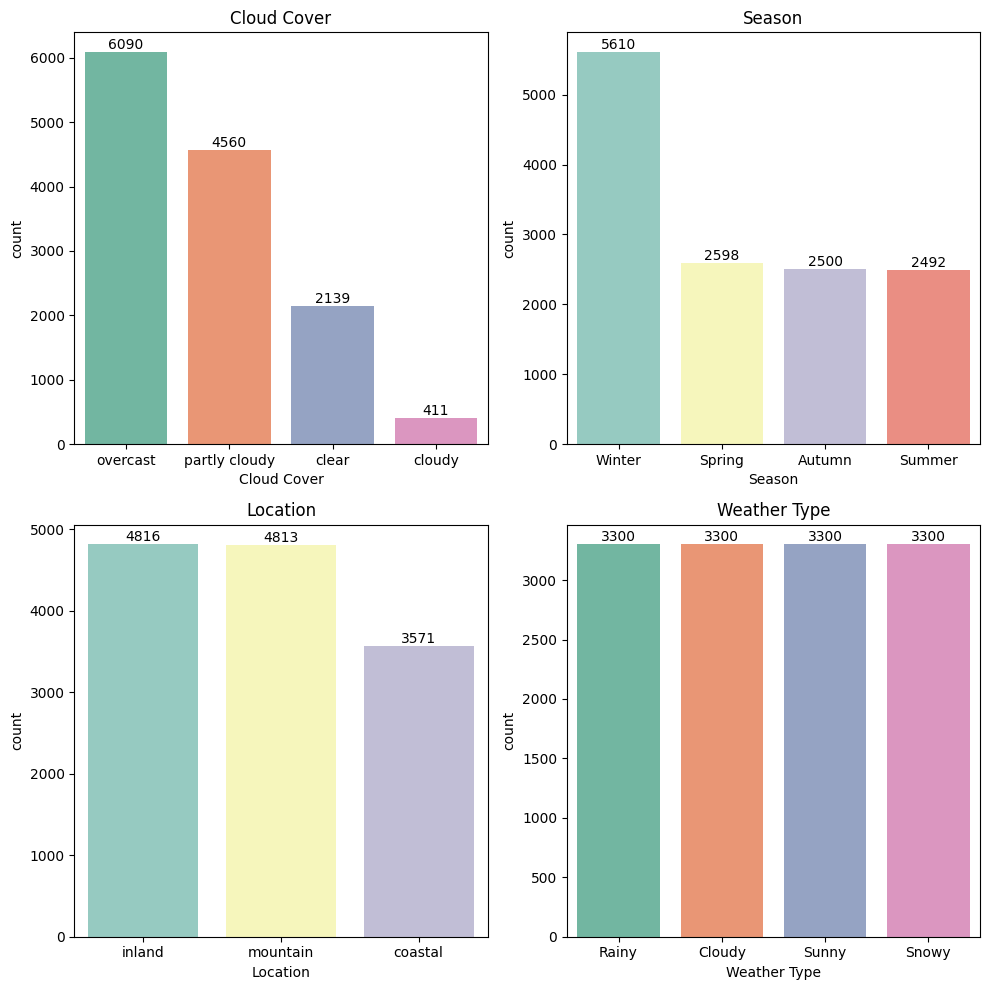

In [37]:
plt.figure(figsize=(10, 10))

# Cloud Cover
plt.subplot(2, 2, 1)
ax = sns.countplot(x=data['Cloud Cover'], order=data['Cloud Cover'].value_counts(ascending=False).index, palette='Set2', hue=None, legend=False)
if ax.patches:  # Check if there are bars (patches) in the plot
    abs_values = data['Cloud Cover'].value_counts(ascending=False).values
    for patch, label in zip(ax.patches, abs_values):
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Cloud Cover")
plt.title("Cloud Cover")

# Season
plt.subplot(2, 2, 2)
ax1 = sns.countplot(x=data['Season'], order=data['Season'].value_counts(ascending=False).index, palette='Set3', hue=None, legend=False)
if ax1.patches:
    abs1_values = data['Season'].value_counts(ascending=False).values
    for patch, label in zip(ax1.patches, abs1_values):
        ax1.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Season")
plt.title("Season")

# Location
plt.subplot(2, 2, 3)
ax2 = sns.countplot(x=data['Location'], order=data['Location'].value_counts(ascending=False).index, palette='Set3', hue=None, legend=False)
if ax2.patches:
    abs2_values = data['Location'].value_counts(ascending=False).values
    for patch, label in zip(ax2.patches, abs2_values):
        ax2.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Location")
plt.title("Location")

# Weather Type
plt.subplot(2, 2, 4)
ax3 = sns.countplot(x=data['Weather Type'], order=data['Weather Type'].value_counts(ascending=False).index, palette='Set2', hue=None, legend=False)
if ax3.patches:
    abs3_values = data['Weather Type'].value_counts(ascending=False).values
    for patch, label in zip(ax3.patches, abs3_values):
        ax3.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Weather Type")
plt.title("Weather Type")

plt.tight_layout()
plt.show()


<ipython-input-38-eee804532adb>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Humidity',data = data,ci = None)
<ipython-input-38-eee804532adb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Wind Speed', data =data,ci = None)
<ipython-input-38-eee804532adb>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Precipitation (%)', data =data,ci = None)
<ipython-input-38-eee804532adb>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Atmospheric Pressure', data =data,ci = None)
<ipython-input-38-eee804532adb>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='UV Index', d

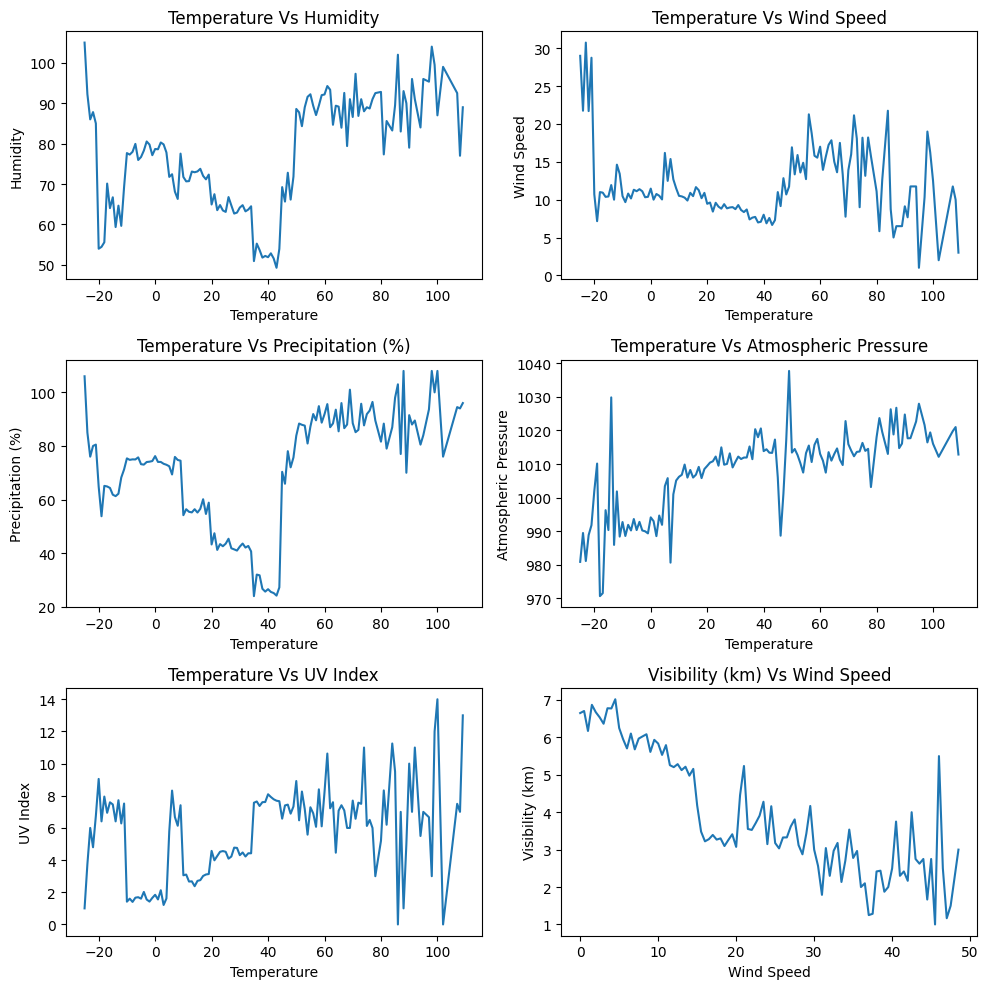

In [38]:
plt.figure(figsize =(10,10))

plt.subplot(3,2,1)
sns.lineplot(x = 'Temperature', y ='Humidity',data = data,ci = None)
plt.title("Temperature Vs Humidity")

plt.subplot(3,2,2)
sns.lineplot(x = 'Temperature', y ='Wind Speed', data =data,ci = None)
plt.title("Temperature Vs Wind Speed")

plt.subplot(3,2,3)
sns.lineplot(x = 'Temperature', y ='Precipitation (%)', data =data,ci = None)
plt.title("Temperature Vs Precipitation (%)")

plt.subplot(3,2,4)
sns.lineplot(x = 'Temperature', y ='Atmospheric Pressure', data =data,ci = None)
plt.title("Temperature Vs Atmospheric Pressure")

plt.subplot(3,2,5)
sns.lineplot(x = 'Temperature', y ='UV Index', data =data,ci = None)
plt.title("Temperature Vs UV Index")

plt.subplot(3,2,6)
sns.lineplot(y = 'Visibility (km)', x ='Wind Speed', data =data,ci = None)
plt.title("Visibility (km) Vs Wind Speed")

plt.tight_layout()
plt.show()

<ipython-input-39-5b166ec029d1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Humidity',data = data,color = 'blue',ci = None)
<ipython-input-39-5b166ec029d1>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Wind Speed', data =data,color = 'green',ci = None)
<ipython-input-39-5b166ec029d1>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Precipitation (%)', data =data,color = 'orange',ci = None)
<ipython-input-39-5b166ec029d1>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Atmospheric Pressure', data =data,color = 'purple',ci = None)
<ipython-input-39-5b166ec029d1>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns

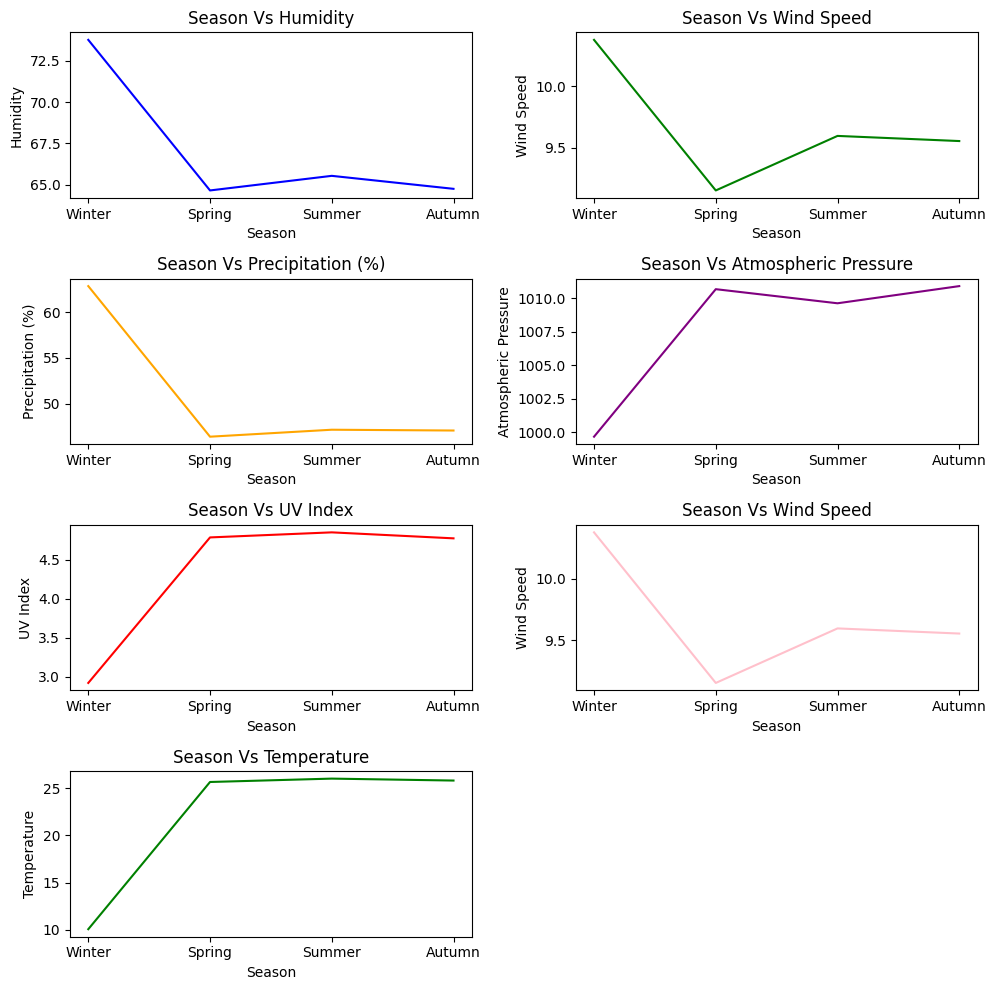

In [39]:
plt.figure(figsize =(10,10))

plt.subplot(4,2,1)
sns.lineplot(x = 'Season', y ='Humidity',data = data,color = 'blue',ci = None)
plt.title("Season Vs Humidity")

plt.subplot(4,2,2)
sns.lineplot(x = 'Season', y ='Wind Speed', data =data,color = 'green',ci = None)
plt.title("Season Vs Wind Speed")

plt.subplot(4,2,3)
sns.lineplot(x = 'Season', y ='Precipitation (%)', data =data,color = 'orange',ci = None)
plt.title("Season Vs Precipitation (%)")

plt.subplot(4,2,4)
sns.lineplot(x = 'Season', y ='Atmospheric Pressure', data =data,color = 'purple',ci = None)
plt.title("Season Vs Atmospheric Pressure")

plt.subplot(4,2,5)
sns.lineplot(x = 'Season', y ='UV Index', data =data,color = 'red',ci = None)
plt.title("Season Vs UV Index")

plt.subplot(4,2,6)
sns.lineplot(x = 'Season', y ='Wind Speed', data =data,color = 'pink',ci = None)
plt.title("Season Vs Wind Speed")

plt.subplot(4,2,7)
sns.lineplot(x = 'Season', y ='Temperature', data =data,color = 'green',ci = None)
plt.title("Season Vs Temperature")

plt.tight_layout()
plt.show()

<Axes: xlabel='Humidity', ylabel='Temperature'>

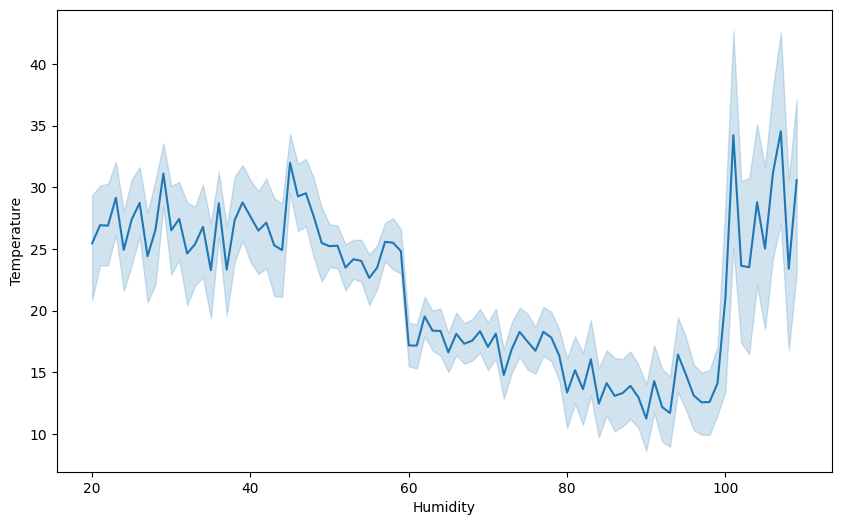

In [40]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = data, x = 'Humidity', y = 'Temperature')

<Figure size 1000x600 with 0 Axes>

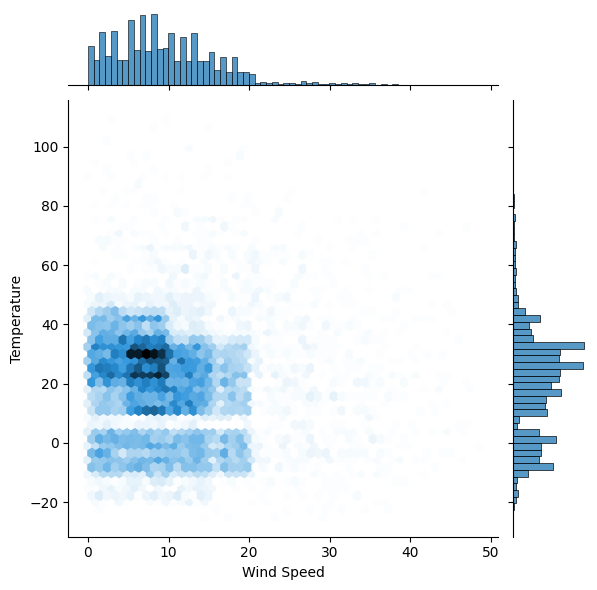

In [41]:
plt.figure(figsize = (10, 6))
sns.jointplot(data = data, x = 'Wind Speed', y = 'Temperature', kind ='hex')

<Axes: xlabel='Atmospheric Pressure', ylabel='Temperature'>

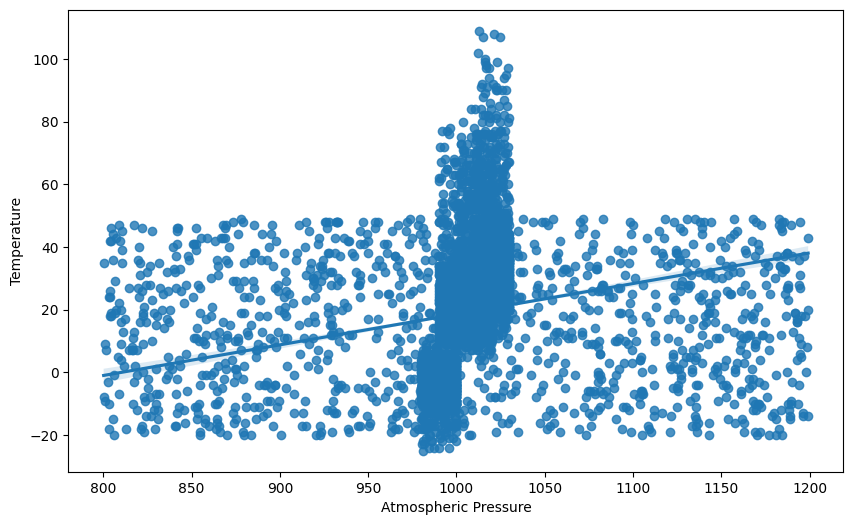

In [42]:
plt.figure(figsize = (10, 6))
sns.regplot(data = data, x = 'Atmospheric Pressure', y = 'Temperature')

<Axes: xlabel='Season', ylabel='Wind Speed'>

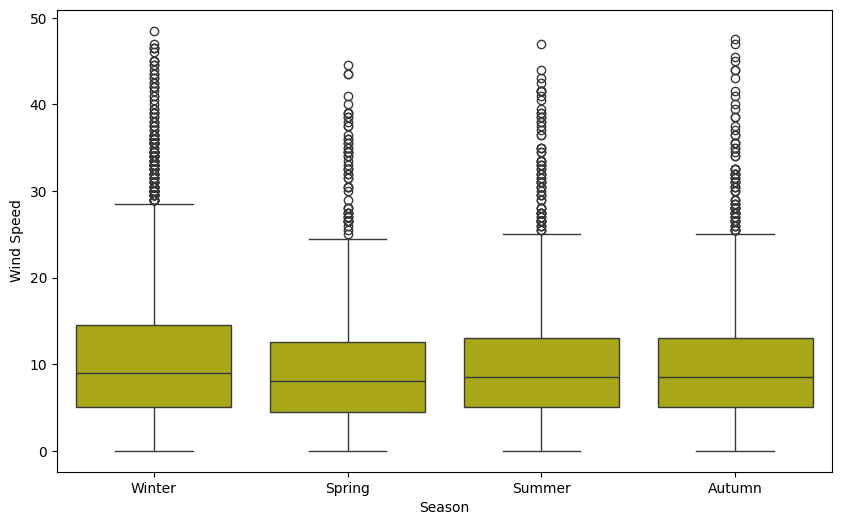

In [43]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'Season', y = 'Wind Speed', color = 'y')

<Axes: xlabel='Weather Type', ylabel='Humidity'>

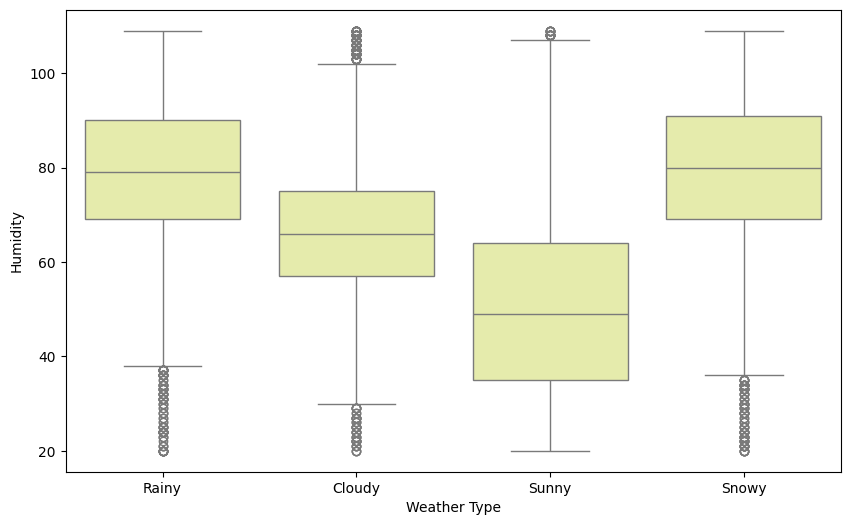

In [44]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'Weather Type', y = 'Humidity', color = '#EDF5A2')

In [45]:
# Label Encoding for categorical columns
le_Cloud_Cover = LabelEncoder()
le_Season = LabelEncoder()
le_Location = LabelEncoder()
le_Weather_Type = LabelEncoder()

In [46]:
data['Cloud_Cover1'] = le_Cloud_Cover.fit_transform(data['Cloud Cover'])
data['Season1'] = le_Season.fit_transform(data['Season'])
data['Location1'] = le_Location.fit_transform(data['Location'])
data['Weather_Type1'] = le_Weather_Type.fit_transform(data['Weather Type'])

In [47]:
# Dropping original columns and other irrelevant columns
df = data.drop(['Cloud Cover', 'Season', 'Weather Type', 'Location', 'Humidity',
                'Wind Speed', 'Atmospheric Pressure'], axis='columns')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        13200 non-null  float64
 1   Precipitation (%)  13200 non-null  float64
 2   UV Index           13200 non-null  int64  
 3   Visibility (km)    13200 non-null  float64
 4   Cloud_Cover1       13200 non-null  int64  
 5   Season1            13200 non-null  int64  
 6   Location1          13200 non-null  int64  
 7   Weather_Type1      13200 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 825.1 KB


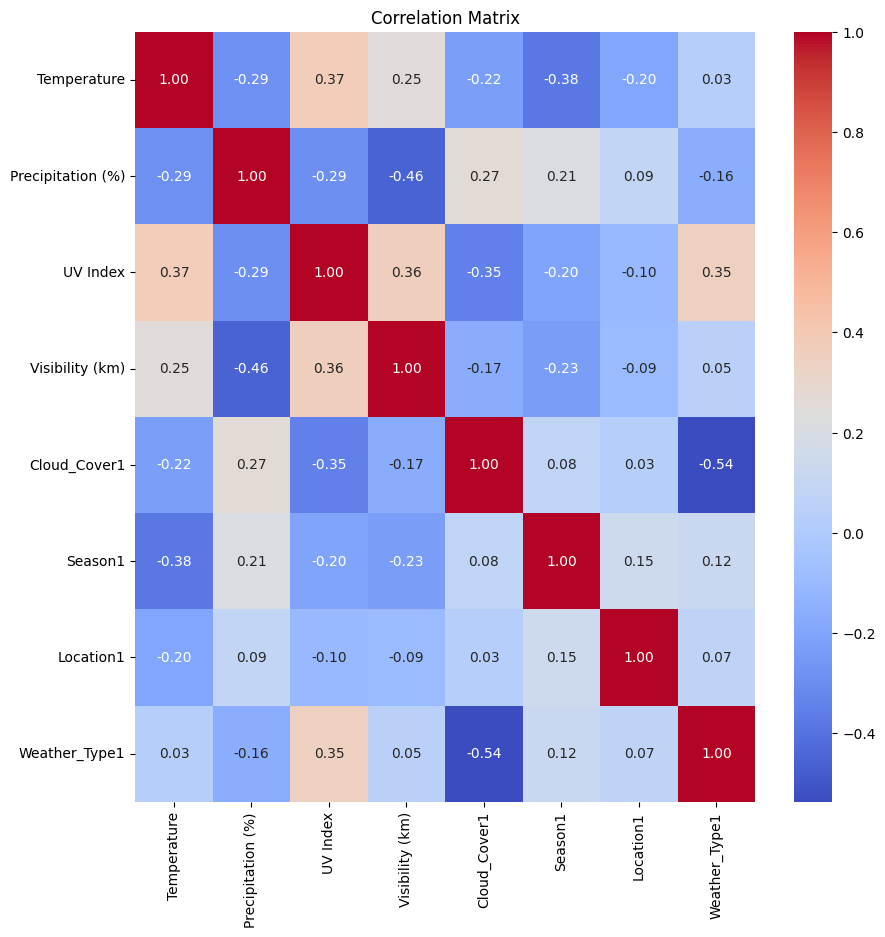

In [50]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [51]:
def det_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Get outliers for each column
outliers = det_outliers(df)
for col, vals in outliers.items():
    print(f"Outliers in {col}:")
    print(vals)
    print("\n")

Outliers in Temperature:
210      78.0
228      73.0
535      80.0
709      74.0
730      76.0
         ... 
12752    90.0
12814    72.0
12878    95.0
13065    97.0
13108    81.0
Name: Temperature, Length: 92, dtype: float64


Outliers in Precipitation (%):
Series([], Name: Precipitation (%), dtype: float64)


Outliers in UV Index:
Series([], Name: UV Index, dtype: int64)


Outliers in Visibility (km):
38       16.5
113      17.5
134      17.0
300      17.0
359      16.0
         ... 
13018    16.5
13025    14.5
13083    15.0
13163    15.0
13178    15.5
Name: Visibility (km), Length: 383, dtype: float64


Outliers in Cloud_Cover1:
2        0
3        0
9        0
11       0
14       0
        ..
13183    0
13188    0
13189    0
13191    0
13192    0
Name: Cloud_Cover1, Length: 2139, dtype: int64


Outliers in Season1:
Series([], Name: Season1, dtype: int64)


Outliers in Location1:
Series([], Name: Location1, dtype: int64)


Outliers in Weather_Type1:
Series([], Name: Weather_Type1, dt

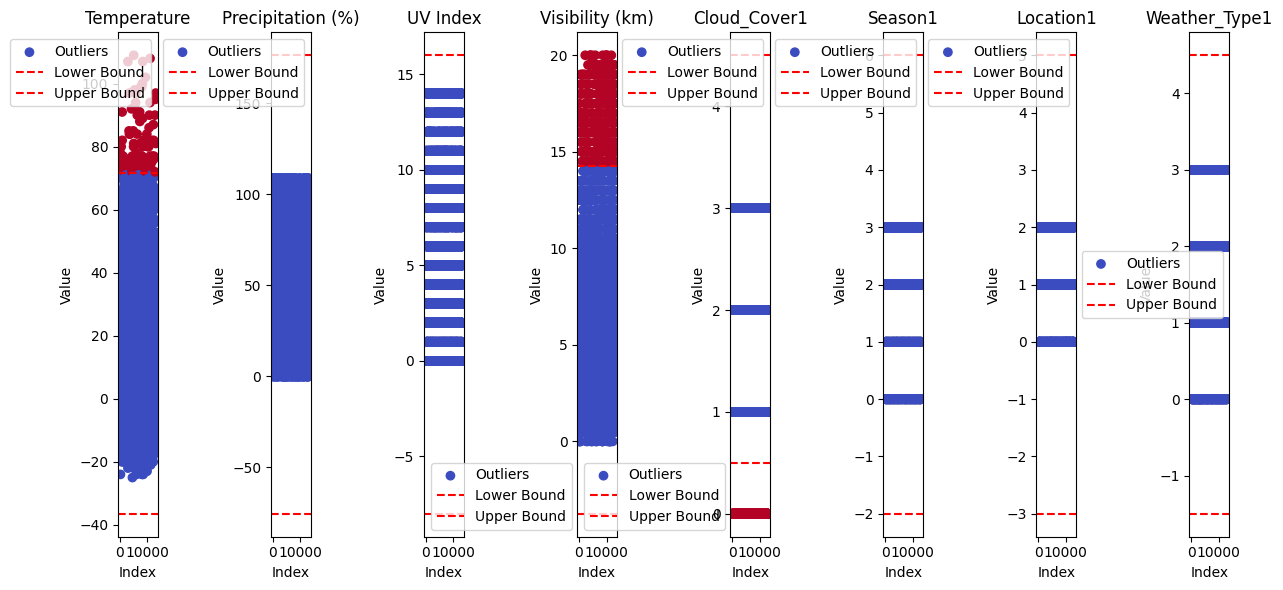

In [52]:
#Visualisation of outliers
def plot_outliers(df):
    plt.figure(figsize=(12, 6))

    for col in df.columns:
        #Calculate Q1, Q3 and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)

        #  Draw Scatter Plot
        plt.subplot(1, len(df.columns), df.columns.get_loc(col) + 1)
        plt.scatter(df.index, df[col], c=is_outlier, cmap='coolwarm', label='Outliers')
        plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
        plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
        plt.title(col)
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_outliers(df)

In [53]:
from scipy import stats

# Remove outliers using Z-Score
cleaned_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [54]:
# Number of rows before the removal of outliers
print(f"Number of rows before: {len(df)}")

# Application to remove outliers
z_scores = np.abs(stats.zscore(df))
cleaned_df = df[(z_scores < 3).all(axis=1)]

#  Number of rows after the removal of outliers
print(f"Number of rows after: {len(cleaned_df)}")

Number of rows before: 13200
Number of rows after: 12826


In [56]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12826 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        12826 non-null  float64
 1   Precipitation (%)  12826 non-null  float64
 2   UV Index           12826 non-null  int64  
 3   Visibility (km)    12826 non-null  float64
 4   Cloud_Cover1       12826 non-null  int64  
 5   Season1            12826 non-null  int64  
 6   Location1          12826 non-null  int64  
 7   Weather_Type1      12826 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 901.8 KB


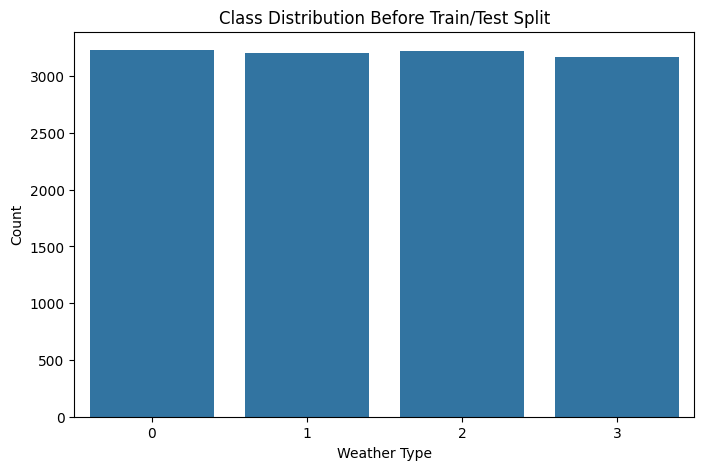

In [57]:
plt.figure(figsize=(8, 5))
sns.countplot(x=cleaned_df['Weather_Type1'])
plt.title("Class Distribution Before Train/Test Split")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.show()


In [58]:
# Splitting data into features and labels
X = cleaned_df.drop('Weather_Type1', axis=1)
Y = cleaned_df['Weather_Type1']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Text(0, 0.5, 'Count')

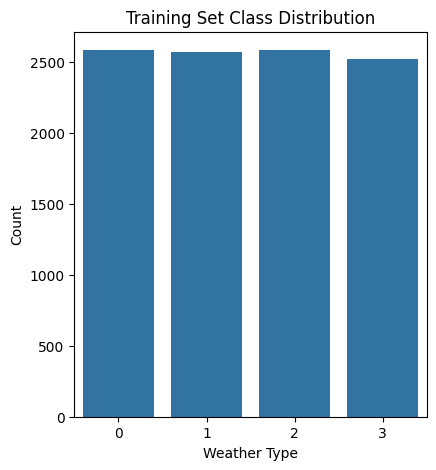

In [60]:
# Visualize class distribution after train/test split
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.xlabel("Weather Type")
plt.ylabel("Count")

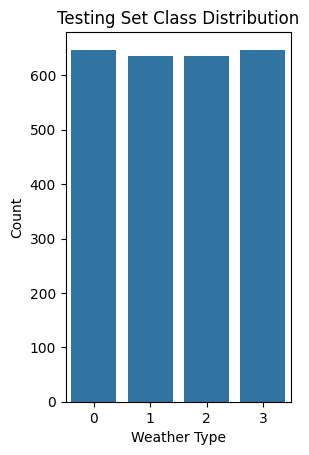

In [61]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Testing Set Class Distribution")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up the grid of hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model on scaled data
grid_search.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_model_logreg = grid_search.best_estimator_

# Predict on scaled test data
y_pred_logreg = best_model_logreg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8764614185502728
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       647
           1       0.87      0.89      0.88       636
           2       0.91      0.95      0.93       636
           3       0.88      0.82      0.85       647

    accuracy                           0.88      2566
   macro avg       0.88      0.88      0.88      2566
weighted avg       0.88      0.88      0.88      2566



In [72]:
cv_scores = cross_val_score(best_model, X, Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.87412315 0.88265107 0.87758285 0.88421053 0.86900585]
Mean CV Accuracy: 0.8775146882534994


In [73]:
y_pred = best_model.predict(X_test)

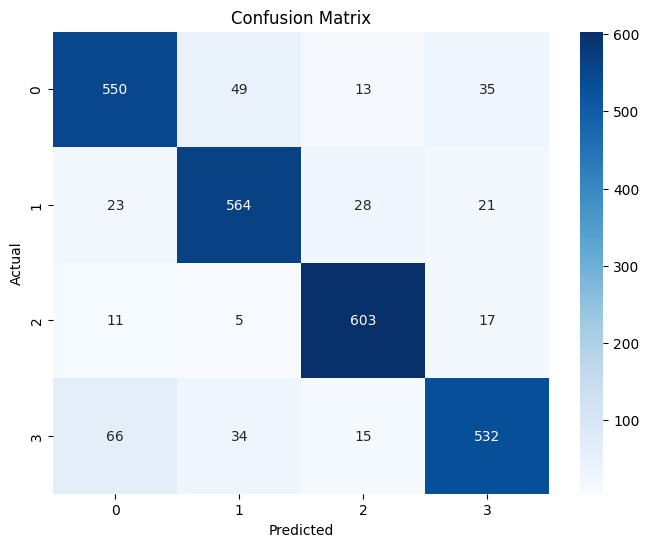

In [74]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
tree = DecisionTreeClassifier()

# Set up the grid of hyperparameters to tune
param_grid_tree = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 10, 20]}

# Set up GridSearchCV with cross-validation
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')

# Fit the model on scaled data
grid_search_tree.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_model_tree = grid_search_tree.best_estimator_

# Predict on test data
y_pred_tree = best_model_tree.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9154325798908808
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       647
           1       0.88      0.91      0.90       636
           2       0.97      0.94      0.96       636
           3       0.95      0.91      0.93       647

    accuracy                           0.92      2566
   macro avg       0.92      0.92      0.92      2566
weighted avg       0.92      0.92      0.92      2566



In [78]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier()

# Set up the grid of hyperparameters to tune
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, None]}

# Set up GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model on scaled data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_model_rf = grid_search_rf.best_estimator_

# Predict on test data
y_pred_rf = best_model_rf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9173811379579111
Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       647
           1       0.89      0.91      0.90       636
           2       0.97      0.94      0.96       636
           3       0.96      0.91      0.93       647

    accuracy                           0.92      2566
   macro avg       0.92      0.92      0.92      2566
weighted avg       0.92      0.92      0.92      2566



In [79]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier()

# Set up the grid of hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 10, 20]
}

# Set up GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')

# Fit the model on scaled data
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_model_xgb = grid_search_xgb.best_estimator_

# Predict on test data
y_pred_xgb = best_model_xgb.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9162120031176929
XGBoost Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       647
           1       0.89      0.90      0.89       636
           2       0.95      0.95      0.95       636
           3       0.96      0.91      0.93       647

    accuracy                           0.92      2566
   macro avg       0.92      0.92      0.92      2566
weighted avg       0.92      0.92      0.92      2566



In [81]:
svm_model = SVC()

# Define hyperparameter grid for SVC
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model and accuracy
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print(f"Best parameters for SVC: {grid_search.best_params_}")
print(f"Accuracy for SVC: {accuracy:.4f}\n")
print(f"Classification Report for SVC:\n", classification_report(y_test, y_pred))

Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Accuracy for SVC: 0.9197

Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       647
           1       0.89      0.92      0.90       636
           2       0.97      0.94      0.96       636
           3       0.94      0.91      0.92       647

    accuracy                           0.92      2566
   macro avg       0.92      0.92      0.92      2566
weighted avg       0.92      0.92      0.92      2566



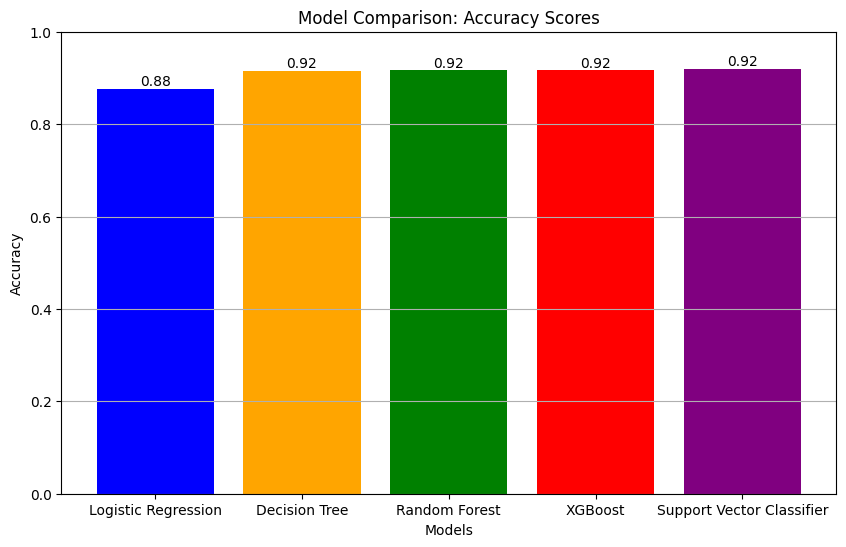

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming you have already defined y_pred_logreg, y_pred_tree, y_pred_rf, y_pred_xgb, and y_pred_svc
# Store the accuracy scores for each model
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Support Vector Classifier']
accuracies = []

# Append accuracies for each model to the list
accuracies.append(accuracy_score(y_test, y_pred_logreg))  # Logistic Regression
accuracies.append(accuracy_score(y_test, y_pred_tree))    # Decision Tree
accuracies.append(accuracy_score(y_test, y_pred_rf))      # Random Forest
accuracies.append(accuracy_score(y_test, y_pred_xgb))     # XGBoost
accuracies.append(accuracy_score(y_test, y_pred))     # Support Vector Classifier

# Plotting the comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')  # va: vertical alignment

plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.title('Model Comparison: Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


In [87]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Importance: {v}')

Feature: Temperature, Importance: 0.2737300783649121
Feature: Precipitation (%), Importance: 0.21230136472766437
Feature: UV Index, Importance: 0.18158416570840039
Feature: Visibility (km), Importance: 0.15634648864348571
Feature: Cloud_Cover1, Importance: 0.10362301427130238
Feature: Season1, Importance: 0.051802602363216266
Feature: Location1, Importance: 0.020612285921018863
